<a href="https://colab.research.google.com/github/zainaae/CODSOFT/blob/main/TitanicSurvival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.PassengerId: A unique identifier for each passenger. This number is assigned by the Titanic dataset creators and does not have any inherent meaning.

2.Survived: This column indicates whether the passenger survived (1) or did not survive (0) the sinking of the Titanic.

3.Pclass: The passenger's class (1st, 2nd, or 3rd) on the ship. This is a proxy for socio-economic status, with 1st class being the highest and 3rd class being the lowest.

4.Name: The name of the passenger. This column includes the passenger's title, first name, and last name.

5.Sex: The gender of the passenger. This column is either "male" or "female".

6.Age: The age of the passenger in years.

7.SibSp: The number of siblings or spouses the passenger had aboard the Titanic.

8.Parch: The number of parents or children the passenger had aboard the Titanic.

9.Ticket: The ticket number of the passenger. This number is assigned by the shipping company and does not have any inherent meaning.

10.Fare: The amount of money the passenger paid for the ticket. This is a measure of the passenger's wealth.

11.Cabin: The cabin number where the passenger stayed. This column is only available for a subset of the passengers.

12.Embarked: The port where the passenger boarded the ship. This can be Cherbourg, Queenstown, or Southampton.

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [56]:
# Load the Titanic dataset
df = pd.read_csv('/content/Titanic-dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [57]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [58]:
# Fill in missing age values with the median age
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

In [59]:
# Fill in missing age values with the median age
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill in missing fare values with the median fare
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [60]:
# Changing Embarked & sex to numeric using label encoding
df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

# Drop the irrelevant columns
df = df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1)

In [61]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [62]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


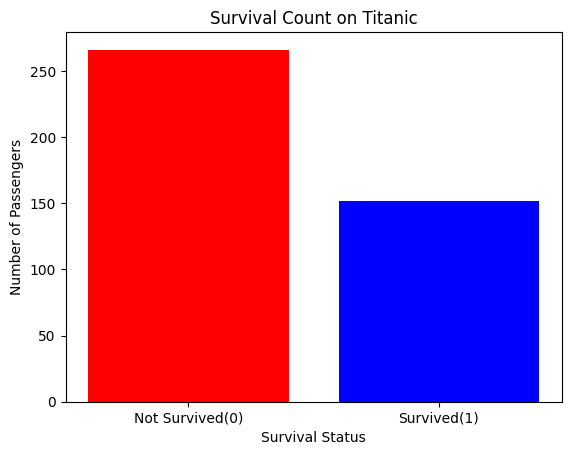

In [63]:
survival_counts = df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts.values, color= ['r','b'], tick_label=['Not Survived(0)', 'Survived(1)'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Survival Count on Titanic')
plt.show()

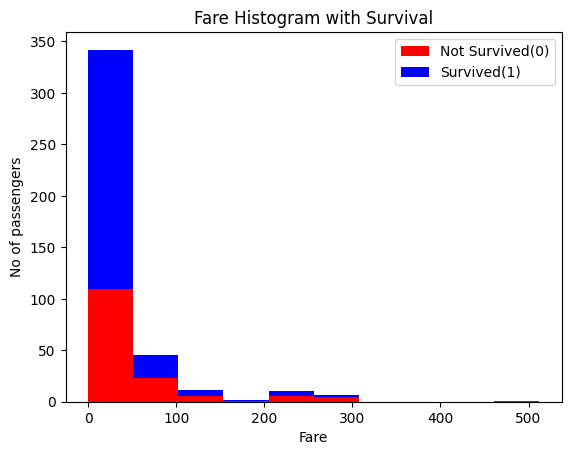

In [64]:
survival_counts = df['Survived'].value_counts()
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['r','b'],label = ['Not Survived(0)','Survived(1)'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

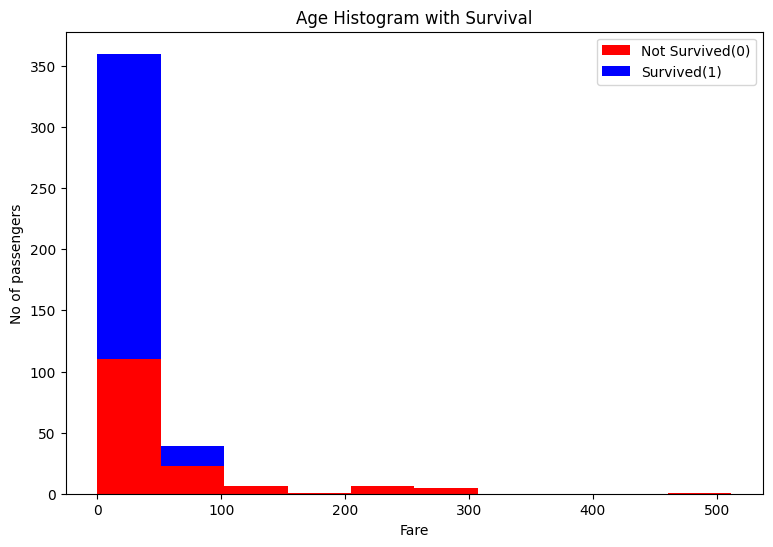

In [65]:
fig = plt.figure(figsize =(9, 6))
survival_counts = df['Survived'].value_counts()
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Age']], stacked=True, color = ['r','b'],label = ['Not Survived(0)','Survived(1)'])
plt.title('Age Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

In [66]:
# Apply SMOTE to handle class imbalance
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [67]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [68]:
# Create a random forest classifier
model = RandomForestClassifier(random_state=42)

In [69]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [70]:
# Print the best hyperparameters found by grid search
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [71]:
# Get the best model
best_model = grid_search.best_estimator_

In [73]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the best model on the train set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [74]:
# Perform 5-fold cross-validation
scores = cross_val_score(best_model, X_train, y_train, cv=5)

In [75]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy*100))

Random Forest Accuracy: 100.00%


In [77]:
# Create a prediction DataFrame
prediction_df = pd.DataFrame({'PassengerId': range(1, len(df) + 1)})
prediction_df['Survived'] = best_model.predict(X)

In [78]:
# Sort the DataFrame by 'PassengerId'
prediction_df = prediction_df.sort_values(by='PassengerId')

In [79]:
# Save the prediction DataFrame to a CSV file
prediction_df.to_csv('/content/Predictions.csv', index=False)

In [80]:
df.describe()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,0.363636,29.574163,0.447368,0.392344,35.133971,1.133971
std,0.481622,0.841838,0.481622,12.721533,0.896760,0.981429,55.855855,0.580452
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,23.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.000000,1.000000
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.000000,2.000000


In [81]:
# Load the predicted dataset
df = pd.read_csv('/content/Predictions.csv')
df

,PassengerId,Survived
0,1,3
1,2,3
2,3,2
3,4,3
4,5,3
...,...,...
413,414,3
414,415,1
415,416,3
416,417,3
